# Bubblesort

In [1]:
##############this contains bubblesort code
def swapsort(test):
    edited = False
    for i in range((len(test)-1)):
        if test[i] > test[i+1]:
            tmp = test[i]
            test[i] = test[i+1]
            test[i+1] = tmp
            edited = True
    return test, edited

def bubblesort(array):
    edited = True
    while edited == True:
        array, edited = swapsort(array)
    return array

### I count:
### 9 assignments
### 3 conditionals

### testing

In [2]:
#####testing
###basic
test = [5,2,8,3,6]
bubblesort(test)

[2, 3, 5, 6, 8]

In [3]:
#####testing
###empty
test = []
bubblesort(test)

[]

In [4]:
#####testing
###single element
test = [5]
bubblesort(test)

[5]

In [5]:
#####testing
###duplicates : 2X 2 2X 5, 2X 8
test = [5,2,2,8,8,3,6,5]
bubblesort(test)

[2, 2, 3, 5, 5, 6, 8, 8]

In [6]:
#####testing
###odd length, even length
test = [5,2,8,3,6]
bubblesort(test)

[2, 3, 5, 6, 8]

In [7]:
#####testing
###odd length, even length
test = [5,2,8,3,6,0.07]
bubblesort(test)

[0.07, 2, 3, 5, 6, 8]

### time / complexity testing

In [8]:
import random

#####create 2D array of size [100][100,200,300...1000]
#####first val is number of reps, second is length of array
test = []
tmp2 = []
tmp1 = []
for i in range(100):
    tmp2 = []
    for j in range(10):
        tmp1_size = 100*(j+1)
        tmp1 = random.sample(range(1,5000),tmp1_size)
        tmp2.append(tmp1)
    test.append(tmp2)
####show shapes
print(len(test[0][0]))
print(len(test[0][1]))
print(len(test[0][2]))
print(len(test[99][2]))
######
print('okay so test list shapes are clear')

100
200
300
300
okay so test list shapes are clear


In [9]:
#######test vectors, print out runtimes
import time

def count_runtime(fn,fn_in):
    start = time.time()
    ####execute
    fn(fn_in)
    ####
    end = time.time()
    return(end-start)
    
#####times is an array of 10 lists
times = []
tmp1 = []
tmp2 = []
for j in range(10):
    tmp1 = []
    for i in range(100):
        tmp_time = count_runtime(bubblesort,test[i][j])
        tmp1.append(tmp_time)
    times.append(tmp1)
######
print('okay so now I got the times')

okay so now I got the times


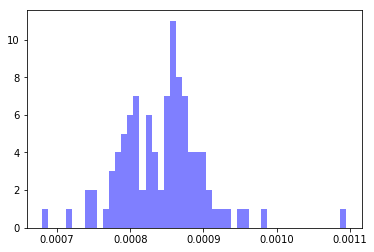

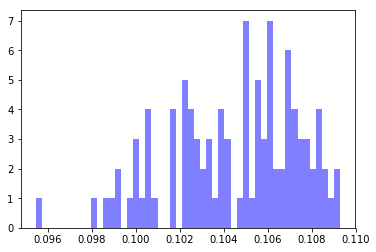

okay so these are normalish


In [14]:
import matplotlib.pyplot as plt

#####plot 100 length
num_bins = 50
n, bins, patches = plt.hist(times[0], num_bins, facecolor='blue', alpha=0.5)
plt.show()
#####plot 1000 length
num_bins = 50
n, bins, patches = plt.hist(times[9], num_bins, facecolor='blue', alpha=0.5)
plt.show()
#####
print('okay so these are normalish')

In [11]:
#######plot median times
import statistics as stats
medians = []
for i in range(10):
    tmp_median = stats.median(times[i])
    print(tmp_median)
    medians.append(tmp_median)


0.0008521080017089844
0.003389120101928711
0.007903814315795898
0.014550209045410156
0.02435934543609619
0.035567641258239746
0.050331950187683105
0.0654897689819336
0.08208143711090088
0.1050114631652832


In [12]:
########find C constant
def power(my_list,exp):
    return [ x**exp for x in my_list ]

import numpy as np
c = medians[9]/(1000**2)
#########define n's
n = np.array([100,200,300,400,500,600,700,800,900,1000])
######calculate theoreticals of C*n^2
ideal_n2 = c * np.square(n)
ideal_nlogn = c * n*(np.log(n))

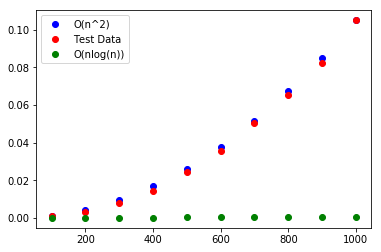

In [13]:
#########plot 
plt.plot(n, ideal_n2, 'bo',label='O(n^2)')
plt.plot(n, medians, 'ro',label='Test Data')
plt.plot(n, ideal_nlogn, 'go',label='O(nlog(n))')
plt.legend(loc='upper left')
plt.show()

## the test data most closely approximates a O(n^2) model although it lies below the theoretical threshold of O(n^2)